# Sample code to demonstrate the use of *K-Prototype* for clustering.

One of the most well known clustering method used today is K-Means. However, this approach works essentially with numerical data. As it tries to group data points around potential cluster centers, it needs to compute the distances between the points and the centers. If these points contain categorical data such as animal preference ['horse', 'cat','bird','dog','fish'] for example, it becomes very difficult to assign a weight to this type of feature.

Here comes K-Prototype to the rescue and helps you to find clusters in spite of the mix of numerical and categorical data. It doesn't work always exceptionally well but it is a neat method to keep in your toolbox.


Data is from Kaggle Competition and freely accessible: [Survey page](https://www.kaggle.com/miroslavsabo/young-people-survey)

*Warning: code may not be the best around, but it is reasonable data scientist level (I come from C++ and always discover new things in python or R!).*

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn as skl

In [2]:
# Load the young people survey dataset
df = pd.read_csv("C:/Users/QP03/1.DataSets/Young People/responsesC.csv")


In [3]:
df

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
0,5.0,3.0,1.0,2.0,1.0,4.0,3.0,3.0,5.0,4.0,...,24.0,168.0,55.0,10.0,female,right handed,college/bachelor degree,no,city,block of flats
1,5.0,3.0,4.0,2.0,4.0,3.0,3.0,5.0,4.0,1.0,...,18.0,163.0,58.0,6.0,female,right handed,secondary school,no,city,block of flats
2,5.0,3.0,5.0,5.0,2.0,5.0,3.0,3.0,3.0,1.0,...,22.0,175.0,86.0,6.0,female,left handed,college/bachelor degree,no,city,block of flats
3,5.0,3.0,3.0,2.0,1.0,2.0,3.0,3.0,2.0,2.0,...,18.0,165.0,45.0,5.0,female,left handed,primary school,no,city,block of flats
4,5.0,5.0,3.0,1.0,3.0,2.0,3.0,3.0,4.0,3.0,...,20.0,158.0,46.0,4.0,female,left handed,secondary school,no,city,block of flats
5,5.0,3.0,4.0,4.0,3.0,4.0,5.0,4.0,3.0,2.0,...,18.0,164.0,51.0,4.0,female,right handed,secondary school,no,city,block of flats
6,5.0,5.0,1.0,5.0,1.0,NaN,5.0,3.0,5.0,5.0,...,18.0,168.0,50.0,4.0,female,right handed,secondary school,no,village,house/bungalow
7,5.0,3.0,2.0,3.0,3.0,4.0,5.0,2.0,1.0,1.0,...,20.0,168.0,50.0,4.0,female,right handed,secondary school,no,village,house/bungalow
8,5.0,3.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,3.0,...,19.0,164.0,53.0,4.0,female,right handed,secondary school,no,village,house/bungalow
9,5.0,3.0,3.0,2.0,5.0,4.0,5.0,3.0,5.0,4.0,...,18.0,172.0,60.0,4.0,female,right handed,secondary school,no,city,NaN


Below, I am performing some data manipulation to replace missing values (with some sort of better accuracy by first subsetting my data. In the end, all is reassembled again.

In [4]:
# process missing values
# (a) assume that according to gender and living location, missing value can be replaced by the most common
Xfc = df[(df["Gender"]=='female')&(df["Village - town"]=='city')]
Xfv = df[(df["Gender"]=='female')&(df["Village - town"]=='village')]
Xmc = df[(df["Gender"]=='male')&(df["Village - town"]=='city')]
Xmv = df[(df["Gender"]=='male')&(df["Village - town"]=='village')]

In [5]:
#(b) fill in the missing values 
X_noNan1= pd.DataFrame(Xfc.apply(lambda x: x.fillna(x.value_counts().index[0]),axis=0))
X_noNan2= pd.DataFrame(Xfv.apply(lambda x: x.fillna(x.value_counts().index[0]),axis=0))
X_noNan3= pd.DataFrame(Xmc.apply(lambda x: x.fillna(x.value_counts().index[0]),axis=0))
X_noNan4= pd.DataFrame(Xmv.apply(lambda x: x.fillna(x.value_counts().index[0]),axis=0))


In [6]:
#(c) re-assemble the disjoint segments
df_noNan = pd.concat([X_noNan1,X_noNan2,X_noNan3,X_noNan4])

We have done a bit research on the data set and the columns containing categorical data are at the following indexes:
[73, 74,107,108,132,144,145,146,147,148,149]

In [7]:
df_noNan.columns.values[[73, 74,107,108,132,144,145,146,147,148,149]]

array(['Smoking', 'Alcohol', 'Punctuality', 'Lying', 'Internet usage',
       'Gender', 'Left - right handed', 'Education', 'Only child',
       'Village - town', 'House - block of flats'], dtype=object)

Let's keep in a list all the numerical field.

In [8]:
#prepare the list of numberical fields, excluding the categorical

list_of_Numeric_fields= ['Music', 'Slow songs or fast songs', 'Dance', 'Folk', 'Country',
       'Classical music', 'Musical', 'Pop', 'Rock', 'Metal or Hardrock',
       'Punk', 'Hiphop, Rap', 'Reggae, Ska', 'Swing, Jazz', 'Rock n roll',
       'Alternative', 'Latino', 'Techno, Trance', 'Opera', 'Movies',
       'Horror', 'Thriller', 'Comedy', 'Romantic', 'Sci-fi', 'War',
       'Fantasy/Fairy tales', 'Animated', 'Documentary', 'Western',
       'Action', 'History', 'Psychology', 'Politics', 'Mathematics',
       'Physics', 'Internet', 'PC', 'Economy Management', 'Biology',
       'Chemistry', 'Reading', 'Geography', 'Foreign languages',
       'Medicine', 'Law', 'Cars', 'Art exhibitions', 'Religion',
       'Countryside, outdoors', 'Dancing', 'Musical instruments',
       'Writing', 'Passive sport', 'Active sport', 'Gardening',
       'Celebrities', 'Shopping', 'Science and technology', 'Theatre',
       'Fun with friends', 'Adrenaline sports', 'Pets', 'Flying', 'Storm',
       'Darkness', 'Heights', 'Spiders', 'Snakes', 'Rats', 'Ageing',
       'Dangerous dogs', 'Fear of public speaking', 
                         #'Smoking', 
                         #'Alcohol',
       'Healthy eating', 'Daily events', 'Prioritising workload',
       'Writing notes', 'Workaholism', 'Thinking ahead', 'Final judgement',
       'Reliability', 'Keeping promises', 'Loss of interest',
       'Friends versus money', 'Funniness', 'Fake', 'Criminal damage',
       'Decision making', 'Elections', 'Self-criticism', 'Judgment calls',
       'Hypochondria', 'Empathy', 'Eating to survive', 'Giving',
       'Compassion to animals', 'Borrowed stuff', 'Loneliness',
       'Cheating in school', 'Health', 'Changing the past', 'God',
       'Dreams', 'Charity', 'Number of friends', 
                         #'Punctuality', 
                         #'Lying',
       'Waiting', 'New environment', 'Mood swings',
       'Appearence and gestures', 'Socializing', 'Achievements',
       'Responding to a serious letter', 'Children', 'Assertiveness',
       'Getting angry', 'Knowing the right people', 'Public speaking',
       'Unpopularity', 'Life struggles', 'Happiness in life',
       'Energy levels', 'Small - big dogs', 'Personality',
       'Finding lost valuables', 'Getting up', 'Interests or hobbies',
       "Parents' advice", 'Questionnaires or polls', 
                         #'Internet usage',
       'Finances', 'Shopping centres', 'Branded clothing',
       'Entertainment spending', 'Spending on looks',
       'Spending on gadgets', 'Spending on healthy eating', 'Age',
       'Height', 'Weight', 'Number of siblings', 
                          #'Gender',
                          #'Left - right handed', 
                          #'Education', 
                          #'Only child', 
                          #'Village - town',
                          #'House - block of flats'
                        ]

Since the algorithm **K-Prototype** also computes distances (a la Kmeans), it is preferrable to scale the portion of the data that is numerical so one feature doesn't prevail on another one. This being said, one interesting approach could be to perform a pre-selection of the most important features to reduce the dimension of our data set and makes things faster. This is not particularly difficult to develop but beyond the scope of what we want to demonstrate.

In [9]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

#scale only the numerical features of our dataset
df_noNan[list_of_Numeric_fields] = scaler.fit_transform(df_noNan[list_of_Numeric_fields])

In [10]:
#quick health check
df_noNan.shape

(1000, 150)

In [11]:
df_noNan

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
0,1.00,0.50,0.00,0.25,0.00,0.75,0.50,0.50,1.00,0.75,...,0.600000,0.751773,0.112903,1.0,female,right handed,college/bachelor degree,no,city,block of flats
1,1.00,0.50,0.75,0.25,0.75,0.50,0.50,1.00,0.75,0.00,...,0.200000,0.716312,0.137097,0.6,female,right handed,secondary school,no,city,block of flats
2,1.00,0.50,1.00,1.00,0.25,1.00,0.50,0.50,0.50,0.00,...,0.466667,0.801418,0.362903,0.6,female,left handed,college/bachelor degree,no,city,block of flats
3,1.00,0.50,0.50,0.25,0.00,0.25,0.50,0.50,0.25,0.25,...,0.200000,0.730496,0.032258,0.5,female,left handed,primary school,no,city,block of flats
4,1.00,1.00,0.50,0.00,0.50,0.25,0.50,0.50,0.75,0.50,...,0.333333,0.680851,0.040323,0.4,female,left handed,secondary school,no,city,block of flats
5,1.00,0.50,0.75,0.75,0.50,0.75,1.00,0.75,0.50,0.25,...,0.200000,0.723404,0.080645,0.4,female,right handed,secondary school,no,city,block of flats
9,1.00,0.50,0.50,0.25,1.00,0.75,1.00,0.50,1.00,0.75,...,0.200000,0.780142,0.153226,0.4,female,right handed,secondary school,no,city,block of flats
10,1.00,0.50,0.25,0.00,0.25,0.75,0.25,0.25,1.00,1.00,...,0.266667,0.773050,0.153226,0.4,female,right handed,secondary school,no,city,house/bungalow
12,1.00,0.50,1.00,0.25,0.25,0.50,0.50,0.75,0.25,0.00,...,0.533333,0.773050,0.104839,0.4,female,right handed,secondary school,no,city,block of flats
15,1.00,0.75,0.00,0.00,0.00,0.00,0.75,1.00,0.75,0.00,...,0.333333,0.716312,0.048387,0.3,female,left handed,secondary school,no,city,block of flats


Everything looks good, our data is scaled and the categorical data is present. Let's run now **Kprototypes**

Steps are

1) prepare the model

2) pass the data indicating where the categorical data is located

It takes a few minutes to run, do not worry. On my laptop with an intel processor i7 - 2.70 GHz and 16Gb RAM, it takes 54 secondes.

In [12]:
from kmodes import kprototypes

#prepare the model and indicate the number of clusters
kproto = kprototypes.KPrototypes(n_clusters=8, init='Cao', verbose=0)

clusters = kproto.fit_predict(df_noNan.as_matrix(), categorical=[73, 74,107,108,132,144,145,146,147,148,149])


## plotting

Plot the number of elements per cluster

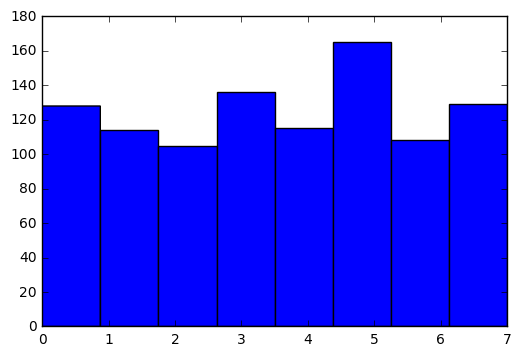

In [20]:
import matplotlib.pyplot as plt
plt.hist(clusters,bins=8)
plt.show()

## Save the data
assign all the cluster numbers to our data points and save the data into a file for later analysis

In [249]:
df_noNan["Cluster"] = clusters

In [250]:
df_noNan.to_csv("C:/Users/QP03/1.DataSets/Young People/ClusteredSurvey.csv")